# Part I

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
raw_orders = pd.read_csv('../data/Orders.csv')
raw_orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [3]:
raw_orders.columns = list(map(lambda x: x.replace('.', '_'), raw_orders.columns))
raw_orders.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,...,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [4]:
raw_orders.shape

(51290, 24)

In [5]:
raw_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row_ID          51290 non-null  int64  
 1   Order_ID        51290 non-null  object 
 2   Order_Date      51290 non-null  object 
 3   Ship_Date       51290 non-null  object 
 4   Ship_Mode       51290 non-null  object 
 5   Customer_ID     51290 non-null  object 
 6   Customer_Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   Postal_Code     9994 non-null   float64
 9   City            51290 non-null  object 
 10  State           51290 non-null  object 
 11  Country         51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Market          51290 non-null  object 
 14  Product_ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub_Category    51290 non-null  object 
 17  Product_Name    51290 non-null 

In [6]:
np.sum(raw_orders.isnull())

Row_ID                0
Order_ID              0
Order_Date            0
Ship_Date             0
Ship_Mode             0
Customer_ID           0
Customer_Name         0
Segment               0
Postal_Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product_ID            0
Category              0
Sub_Category          0
Product_Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping_Cost         0
Order_Priority        0
dtype: int64

In [7]:
raw_orders.describe()

,Row_ID,Postal_Code,Quantity,Discount,Shipping_Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,3.476545,0.142908,26.478567
std,14806.29199,32063.693350,2.278766,0.212280,57.251373
min,1.00000,1040.000000,1.000000,0.000000,1.002000
25%,12823.25000,23223.000000,2.000000,0.000000,2.610000
50%,25645.50000,56430.500000,3.000000,0.000000,7.790000
75%,38467.75000,90008.000000,5.000000,0.200000,24.450000
max,51290.00000,99301.000000,14.000000,0.850000,933.570000


In [8]:
raw_orders.Country.unique()

array(['United States', 'Australia', 'Germany', 'Senegal', 'New Zealand',
       'Afghanistan', 'Saudi Arabia', 'Brazil', 'China', 'France',
       'Italy', 'Tanzania', 'Poland', 'United Kingdom', 'Mexico',
       'El Salvador', 'Taiwan', 'India', 'Dominican Republic',
       'Democratic Republic of the Congo', 'Indonesia', 'Uruguay', 'Iran',
       'Mozambique', 'Bangladesh', 'Spain', 'Ukraine', 'Nicaragua',
       'Morocco', 'Philippines', 'Austria', 'Colombia', 'Netherlands',
       'Malaysia', 'Ecuador', 'Thailand', 'Somalia', 'Guatemala',
       'Belarus', 'Cambodia', 'South Africa', 'Canada', 'Japan', 'Russia',
       'Egypt', 'Azerbaijan', 'Lithuania', 'Argentina', 'Lesotho',
       'Vietnam', 'Cuba', 'Romania', 'Turkey', 'Cameroon', 'Hungary',
       'Singapore', 'Angola', 'Belgium', 'Pakistan', 'Finland', 'Ghana',
       'Zambia', 'Iraq', 'Liberia', 'Georgia', 'Switzerland', 'Albania',
       'Chad', 'Montenegro', 'Namibia', 'Portugal', 'Madagascar',
       'Sweden', 'Myanmar 

In [9]:
raw_orders.Quantity.value_counts()

2     12748
3      9682
1      8963
4      6385
5      4882
6      3020
7      2385
8      1361
9       987
10      276
14      186
12      176
11      156
13       83
Name: Quantity, dtype: int64

## Problem 1

In [10]:
raw_orders[['Profit']]

,Profit
0,$62.15
1,-$288.77
2,$919.97
3,-$96.54
4,$311.52
...,...
51285,$4.50
51286,$3.34
51287,$2.48
51288,$2.40


In [11]:
raw_orders.Sales

0          $221.98
1        $3,709.40
2        $5,175.17
3        $2,892.51
4        $2,832.96
           ...    
51285       $65.10
51286       $16.72
51287        $8.56
51288       $13.44
51289       $61.38
Name: Sales, Length: 51290, dtype: object

In [12]:
data_orders = raw_orders.copy()

In [13]:
data_orders.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Postal_Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product_ID', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority'],
      dtype='object')

In [14]:
data_orders['Profit'] = data_orders['Profit'].map(lambda x: float(x.replace('$', '').replace(',', '')))
data_orders[['Profit']].head()

,Profit
0,62.15
1,-288.77
2,919.97
3,-96.54
4,311.52


In [15]:
data_orders['Sales'] = data_orders['Sales'].map(lambda x: float(x.replace('$', '').replace(',', '')))
data_orders[['Sales']].head()

,Sales
0,221.98
1,3709.40
2,5175.17
3,2892.51
4,2832.96


In [16]:
data_orders.dtypes

Row_ID              int64
Order_ID           object
Order_Date         object
Ship_Date          object
Ship_Mode          object
Customer_ID        object
Customer_Name      object
Segment            object
Postal_Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product_ID         object
Category           object
Sub_Category       object
Product_Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping_Cost     float64
Order_Priority     object
dtype: object

## Problem 2

### #2.1

In [17]:
import datetime

data_orders['Order_M_Y'] = pd.to_datetime(data_orders['Order_Date']).dt.to_period('M')
data_orders['Ship_M_Y'] = pd.to_datetime(data_orders['Ship_Date']).dt.to_period('M')
data_orders.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,...,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_M_Y,Ship_M_Y
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,2014-11,2014-11
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2014-02,2014-02
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,2014-10,2014-10
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,2014-01,2014-01
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,2014-11,2014-11


In [18]:
# should change the Order.Date to reflect the months of the seasons

data_orders = data_orders.sort_values('Order_M_Y', ascending=True)
data_orders.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,...,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_M_Y,Ship_M_Y
9257,11999,ES-2012-RP1985548-40920,1/12/12,1/19/12,Standard Class,RP-1985548,Roy Phan,Corporate,NaN,Lohne,...,Bookcases,"Ikea Stackable Bookrack, Traditional",551.61,5,0.1,165.36,35.98,Medium,2012-01,2012-01
12684,48120,MG-2012-SH997584-40929,1/21/12,1/27/12,Standard Class,SH-997584,Sally Hughsby,Corporate,NaN,Ulan Bator,...,Chairs,"Office Star Rocking Chair, Black",276.96,2,0.0,55.38,24.75,Medium,2012-01,2012-01
31883,9273,MX-2012-VG2179018-40926,1/18/12,1/23/12,Standard Class,VG-2179018,Vivek Gonzalez,Consumer,NaN,Manaus,...,Fasteners,"OIC Clamps, 12 Pack",38.40,3,0.0,6.12,4.70,Medium,2012-01,2012-01
2709,30450,ID-2012-KL1664592-40911,1/3/12,1/9/12,Standard Class,KL-1664592,Ken Lonsdale,Consumer,NaN,Papakura,...,Copiers,"Hewlett Wireless Fax, Laser",912.46,4,0.4,-319.46,107.10,Low,2012-01,2012-01
34012,15911,IT-2012-DP1300045-40916,1/8/12,1/14/12,Standard Class,DP-1300045,Darren Powers,Consumer,NaN,Toulouse,...,Art,"Binney & Smith Sketch Pad, Blue",115.80,5,0.5,-55.65,3.91,Medium,2012-01,2012-01


In [19]:
group_season = data_orders.groupby(['Order_M_Y', 'Category'])[['Quantity']].agg('sum')
group_season

Quantity
Order_M_Y Category                 
2012-01   Furniture             246
          Office Supplies       997
          Technology            220
2012-02   Furniture             278
          Office Supplies       800
...                             ...
2015-11   Office Supplies      4656
          Technology           1597
2015-12   Furniture            1527
          Office Supplies      4553
          Technology           1433

[144 rows x 1 columns]

<AxesSubplot:xlabel='Order_M_Y'>

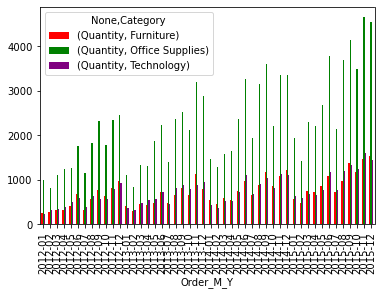

In [20]:
group_season.unstack().plot(kind='bar', color=['red', 'green', 'purple'])

### #2.2

## Problem 3

### #3.1

In [21]:
raw_returns = pd.read_csv('../data/Returns.csv')
raw_returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [22]:
raw_returns.columns = list(map(lambda x: x.replace(' ', '_'), raw_returns.columns))
raw_returns.head()

,Returned,Order_ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [23]:
raw_returns.shape

(1079, 3)

In [24]:
raw_returns.Returned.value_counts()

Yes    1079
Name: Returned, dtype: int64

In [25]:
data_returns = pd.merge(data_orders, raw_returns, on='Order_ID')

# if we do an inner join without specifying the key, it joins by row index
data_returns

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,...,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_M_Y,Ship_M_Y,Returned,Region_y
0,9065,MX-2012-AW1093031-40912,1/4/12,1/8/12,Standard Class,AW-1093031,Arthur Wiediger,Home Office,NaN,Santiago de Cuba,...,37.84,2,0.0,2.24,3.937,Medium,2012-01,2012-01,Yes,Caribbean
1,9066,MX-2012-AW1093031-40912,1/4/12,1/8/12,Standard Class,AW-1093031,Arthur Wiediger,Home Office,NaN,Santiago de Cuba,...,38.26,1,0.0,6.88,4.253,Medium,2012-01,2012-01,Yes,Caribbean
2,9067,MX-2012-AW1093031-40912,1/4/12,1/8/12,Standard Class,AW-1093031,Arthur Wiediger,Home Office,NaN,Santiago de Cuba,...,38.58,3,0.0,7.68,3.514,Medium,2012-01,2012-01,Yes,Caribbean
3,16316,ES-2012-DJ1351048-40923,1/15/12,1/20/12,Second Class,DJ-1351048,Don Jones,Corporate,NaN,Langen,...,526.62,2,0.0,10.50,92.100,Medium,2012-01,2012-01,Yes,Western Europe
4,16314,ES-2012-DJ1351048-40923,1/15/12,1/20/12,Second Class,DJ-1351048,Don Jones,Corporate,NaN,Langen,...,54.60,2,0.0,2.16,4.120,Medium,2012-01,2012-01,Yes,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,36706,CA-2015-DM13345140-42347,12/9/15,12/15/15,Standard Class,DM-133451404,Denise Monton,Corporate,94109.0,San Francisco,...,90.48,3,0.2,33.93,9.140,Low,2015-12,2015-12,Yes,Western US
2216,36707,CA-2015-DM13345140-42347,12/9/15,12/15/15,Standard Class,DM-133451404,Denise Monton,Corporate,94109.0,San Francisco,...,42.76,1,0.0,11.12,6.210,Low,2015-12,2015-12,Yes,Western US
2217,36704,CA-2015-DM13345140-42347,12/9/15,12/15/15,Standard Class,DM-133451404,Denise Monton,Corporate,94109.0,San Francisco,...,87.92,4,0.0,40.44,2.270,Low,2015-12,2015-12,Yes,Western US
2218,36705,CA-2015-DM13345140-42347,12/9/15,12/15/15,Standard Class,DM-133451404,Denise Monton,Corporate,94109.0,San Francisco,...,22.42,1,0.2,8.41,2.390,Low,2015-12,2015-12,Yes,Western US


In [26]:
# data_returns = pd.concat([season_data, raw_returns[['Returned']]], axis=1, join='inner', keys='Order_ID')

# # if we do an inner join without specifying the key, it joins by row index
# data_returns

In [27]:
np.sum(data_returns[data_returns['Profit'] < 0].Profit)

-36832.600000000006

In [28]:
group_loss = data_returns[data_returns['Profit'] < 0]
group_loss = group_loss.groupby(group_loss.Order_M_Y.dt.year)[['Profit']].agg('sum')
group_loss

,Profit
Order_M_Y,
2012,-5772.54
2013,-7713.03
2014,-7439.43
2015,-15907.60


### #3.2

In [29]:
return_1 = np.sum(data_returns.groupby(['Customer_ID'])[['Returned']].count() > 1)

return_1

Returned    547
dtype: int64

In [30]:
return_5 = data_returns.groupby(['Customer_ID'])[['Returned']].count() > 5
return_5 = return_5[return_5['Returned']==True]
return_5.count()

Returned    46
dtype: int64

### #3.3

<AxesSubplot:xlabel='Region_y'>

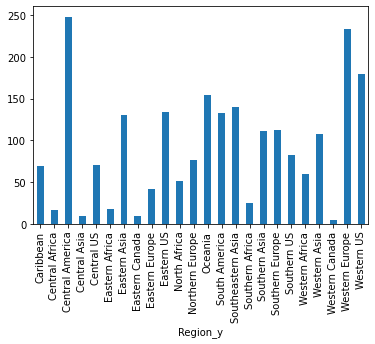

In [31]:
by_region = data_returns.groupby(['Region_y']).size()
by_region.plot.bar()

### #3.4

<AxesSubplot:xlabel='Category'>

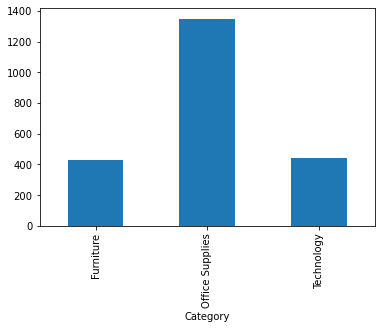

In [32]:
by_category = data_returns.groupby(['Category']).size()
by_category.plot.bar()

<AxesSubplot:xlabel='Sub_Category'>

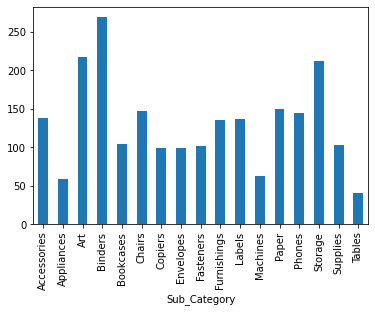

In [33]:
by_category = data_returns.groupby(['Sub_Category']).size()
by_category.plot.bar()

# Part II

## Problem 4

### #4.1

In [34]:
# returns_cat = data_orders.merge(data_returns,
#                                 how='left',
#                                 left_on='Order_ID',
#                                right_on='Order_ID',
#                                suffixes=(False, False))

# returns_cat

In [35]:
# Return an outer join based on the 'Order_ID' key named 'returns_cat'
    # The 'Returned' column will return NaN for items not returned
    
# Concatenating the 2 dataframes alters the column names

# data = orders.merge(returns,on=‘OrderID’,how=‘left’)

returns_cat = pd.concat([data_orders, data_returns[['Returned']]],
                        axis=1,
                        ignore_index=True,
                        verify_integrity=True,
                        keys='Row_ID')

returns_cat

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Samsung Convoy 3,221.98,2,0.0,62.15,40.770,High,2014-11,2014-11,Yes
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.630,Critical,2014-02,2014-02,Yes
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium,2014-10,2014-10,Yes
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.160,Medium,2014-01,2014-01,Yes
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.040,Critical,2014-11,2014-11,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,6/19/15,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium,2015-06,2015-06,NaN
51286,34337,US-2014-ZD21925140-41765,5/6/14,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High,2014-05,2014-05,NaN
51287,31315,CA-2012-ZD21925140-41147,8/26/12,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,Newell 341,8.56,2,0.0,2.48,1.580,High,2012-08,2012-08,NaN
51288,9596,MX-2013-RB1979518-41322,2/17/13,2/21/13,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,"Acco Index Tab, Economy",13.44,2,0.0,2.40,1.003,Medium,2013-02,2013-02,NaN


In [36]:
returns_cat.columns

RangeIndex(start=0, stop=27, step=1)

In [37]:
new_cols = list(data_orders.columns)
new_cols.append('Returned')
new_cols

['Row_ID',
 'Order_ID',
 'Order_Date',
 'Ship_Date',
 'Ship_Mode',
 'Customer_ID',
 'Customer_Name',
 'Segment',
 'Postal_Code',
 'City',
 'State',
 'Country',
 'Region',
 'Market',
 'Product_ID',
 'Category',
 'Sub_Category',
 'Product_Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping_Cost',
 'Order_Priority',
 'Order_M_Y',
 'Ship_M_Y',
 'Returned']

In [38]:
returns_cat.columns = new_cols
returns_cat

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,...,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_M_Y,Ship_M_Y,Returned
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Samsung Convoy 3,221.98,2,0.0,62.15,40.770,High,2014-11,2014-11,Yes
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.630,Critical,2014-02,2014-02,Yes
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium,2014-10,2014-10,Yes
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.160,Medium,2014-01,2014-01,Yes
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.040,Critical,2014-11,2014-11,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,6/19/15,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium,2015-06,2015-06,NaN
51286,34337,US-2014-ZD21925140-41765,5/6/14,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High,2014-05,2014-05,NaN
51287,31315,CA-2012-ZD21925140-41147,8/26/12,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,Newell 341,8.56,2,0.0,2.48,1.580,High,2012-08,2012-08,NaN
51288,9596,MX-2013-RB1979518-41322,2/17/13,2/21/13,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,"Acco Index Tab, Economy",13.44,2,0.0,2.40,1.003,Medium,2013-02,2013-02,NaN


In [39]:
# Get a sample to make sure that everything is in order

returns_cat['Returned'].sample(10)

49877    NaN
41615    NaN
18630    NaN
18785    NaN
727      Yes
37115    NaN
24749    NaN
25884    NaN
21277    NaN
20086    NaN
Name: Returned, dtype: object

In [40]:
# Swap with 1s and 0s
    # no need to use fillna() bc 'Yes' will be 1 and everything else, 0
    
returns_cat['Returned'] = returns_cat['Returned'].map(lambda x: 1 if x=='Yes' else 0)

In [41]:
returns_cat['Returned'].sample(20)

35340    0
8827     0
22569    0
5906     0
2704     0
35427    0
40065    0
48600    0
3895     0
2818     0
24596    0
36766    0
44231    0
14296    0
3966     0
11375    0
21593    0
30561    0
34747    0
31063    0
Name: Returned, dtype: int64

### #4.2

In [42]:
# Convert the Ship_Date and Order_Date columns to datetime
# Create a column called 'Process_Time'
    # Must use dt.days because without it, the result would be '# Days' rather than #

returns_cat[['Ship_Date', 'Order_Date']] = returns_cat[['Ship_Date', 'Order_Date']].apply(pd.to_datetime)

returns_cat['Process_Time'] = (returns_cat['Ship_Date'] - returns_cat['Order_Date']).dt.days
returns_cat

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,...,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_M_Y,Ship_M_Y,Returned,Process_Time
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,221.98,2,0.0,62.15,40.770,High,2014-11,2014-11,1,2
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,3709.40,9,0.1,-288.77,923.630,Critical,2014-02,2014-02,1,2
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,5175.17,9,0.1,919.97,915.490,Medium,2014-10,2014-10,1,1
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,2892.51,5,0.1,-96.54,910.160,Medium,2014-01,2014-01,1,2
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,2832.96,8,0.0,311.52,903.040,Critical,2014-11,2014-11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,65.10,5,0.0,4.50,1.010,Medium,2015-06,2015-06,0,0
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,16.72,5,0.2,3.34,1.930,High,2014-05,2014-05,0,4
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,8.56,2,0.0,2.48,1.580,High,2012-08,2012-08,0,5
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,13.44,2,0.0,2.40,1.003,Medium,2013-02,2013-02,0,4


In [43]:
# Check .info() to see if the last column is indeed an integer value

returns_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 51289
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row_ID          51290 non-null  int64         
 1   Order_ID        51290 non-null  object        
 2   Order_Date      51290 non-null  datetime64[ns]
 3   Ship_Date       51290 non-null  datetime64[ns]
 4   Ship_Mode       51290 non-null  object        
 5   Customer_ID     51290 non-null  object        
 6   Customer_Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal_Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product_ID      51290 non-null  object        
 15  Ca

### #4.3

In [44]:
# General check of groupby

returns_cat.groupby(['Product_ID']).agg('count')[['Sales']]

,Sales
Product_ID,
FUR-BO-3174,2
FUR-BO-3175,8
FUR-BO-3176,6
FUR-BO-3177,8
FUR-BO-3409,8
...,...
TEC-PH-6365,10
TEC-PH-6413,6
TEC-PH-6425,7


In [45]:
# Check a single Product_ID

returns_cat[returns_cat['Product_ID']=='FUR-BO-3175']

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,...,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_M_Y,Ship_M_Y,Returned,Process_Time
8442,32836,CA-2015-CL11890140-42263,2015-09-16,2015-09-18,Second Class,CL-118901406,Carl Ludwig,Consumer,2149.0,Everett,...,782.94,3,0.00,203.56,123.26,High,2015-09,2015-09,0,2
25713,38147,US-2014-JO15145140-41647,2014-01-08,2014-01-12,Standard Class,JO-151451402,Jack O'Briant,Corporate,53132.0,Franklin,...,1565.88,6,0.00,407.13,102.06,Medium,2014-01,2014-01,0,4
37657,31489,CA-2013-MP17470140-41559,2013-10-12,2013-10-14,First Class,MP-174701406,Mark Packer,Home Office,10035.0,New York City,...,626.35,3,0.20,46.98,160.17,Critical,2013-10,2013-10,0,2
39387,31666,CA-2014-MK17905140-41934,2014-10-22,2014-10-22,Same Day,MK-179051406,Michael Kennedy,Corporate,6040.0,Manchester,...,1043.92,4,0.00,271.42,152.15,High,2014-10,2014-10,0,0
45816,35682,US-2013-RA19915140-41475,2013-07-20,2013-07-27,Standard Class,RA-199151402,Russell Applegate,Consumer,60035.0,Highland Park,...,913.43,5,0.30,-52.20,75.55,Low,2013-07,2013-07,0,7
46854,33650,CA-2013-SC20260140-41517,2013-08-31,2013-09-02,First Class,SC-202601404,Scott Cohen,Corporate,94122.0,San Francisco,...,1552.83,7,0.15,200.95,343.97,High,2013-08,2013-09,0,2
48253,31335,CA-2013-SN20710140-41635,2013-12-27,2013-12-31,Standard Class,SN-207101402,Steve Nguyen,Home Office,77041.0,Houston,...,532.40,3,0.32,-46.98,10.68,Medium,2013-12,2013-12,0,4
50065,37252,CA-2012-TS21430140-41223,2012-11-10,2012-11-14,Second Class,TS-214301406,Tom Stivers,Corporate,19601.0,Reading,...,521.96,4,0.50,-250.54,41.99,Medium,2012-11,2012-11,0,4


In [46]:
returns_cat_yes = pd.DataFrame(returns_cat[returns_cat['Returned']==1]['Product_ID'].value_counts())
returns_cat_yes

,Product_ID
TEC-PH-5355,28
TEC-PH-5268,23
TEC-PH-3148,22
TEC-PH-3806,21
TEC-PH-5839,15
...,...
TEC-MA-5021,1
TEC-PH-5846,1
TEC-CO-4773,1
FUR-TA-3410,1


In [47]:
returns_cat_yes.loc[['TEC-PH-5355']]

,Product_ID
TEC-PH-5355,28


In [48]:
# Filter for returns (==1)
# Group by Product_ID

returns_cat_yes2 = returns_cat[returns_cat['Returned']==1].groupby('Product_ID').agg('count')[['Returned']]

returns_cat_yes2

,Returned
Product_ID,
FUR-BO-3176,1
FUR-BO-3624,7
FUR-BO-3625,3
FUR-BO-3626,5
FUR-BO-3627,8
...,...
TEC-PH-5842,8
TEC-PH-5843,3
TEC-PH-5844,2


In [49]:
returns_cat_yes2.loc[['TEC-PH-5355']]

,Returned
Product_ID,
TEC-PH-5355,28


In [50]:
returns_cat = returns_cat.merge(returns_cat_yes2, how='left', on='Product_ID')
returns_cat

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,...,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_M_Y,Ship_M_Y,Returned_x,Process_Time,Returned_y
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,2,0.0,62.15,40.770,High,2014-11,2014-11,1,2,1.0
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,9,0.1,-288.77,923.630,Critical,2014-02,2014-02,1,2,8.0
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,9,0.1,919.97,915.490,Medium,2014-10,2014-10,1,1,13.0
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,5,0.1,-96.54,910.160,Medium,2014-01,2014-01,1,2,11.0
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,8,0.0,311.52,903.040,Critical,2014-11,2014-11,1,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,5,0.0,4.50,1.010,Medium,2015-06,2015-06,0,0,NaN
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,5,0.2,3.34,1.930,High,2014-05,2014-05,0,4,1.0
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,2,0.0,2.48,1.580,High,2012-08,2012-08,0,5,NaN
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,2,0.0,2.40,1.003,Medium,2013-02,2013-02,0,4,NaN


In [51]:
returns_cat.rename(columns={'Returned_x':'Returned', 'Returned_y':'Times_Returned'}, inplace=True)
returns_cat.loc[returns_cat['Times_Returned']!=1, 'Times_Returned']=0
returns_cat

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,...,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_M_Y,Ship_M_Y,Returned,Process_Time,Times_Returned
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,2,0.0,62.15,40.770,High,2014-11,2014-11,1,2,1.0
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,9,0.1,-288.77,923.630,Critical,2014-02,2014-02,1,2,0.0
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,9,0.1,919.97,915.490,Medium,2014-10,2014-10,1,1,0.0
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,5,0.1,-96.54,910.160,Medium,2014-01,2014-01,1,2,0.0
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,8,0.0,311.52,903.040,Critical,2014-11,2014-11,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,5,0.0,4.50,1.010,Medium,2015-06,2015-06,0,0,0.0
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,5,0.2,3.34,1.930,High,2014-05,2014-05,0,4,1.0
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,2,0.0,2.48,1.580,High,2012-08,2012-08,0,5,0.0
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,2,0.0,2.40,1.003,Medium,2013-02,2013-02,0,4,0.0


In [52]:
returns_cat['Times_Returned'] = returns_cat.Times_Returned.astype('int32')

In [53]:
returns_cat

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,...,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_M_Y,Ship_M_Y,Returned,Process_Time,Times_Returned
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,2,0.0,62.15,40.770,High,2014-11,2014-11,1,2,1
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,9,0.1,-288.77,923.630,Critical,2014-02,2014-02,1,2,0
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,9,0.1,919.97,915.490,Medium,2014-10,2014-10,1,1,0
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,5,0.1,-96.54,910.160,Medium,2014-01,2014-01,1,2,0
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,8,0.0,311.52,903.040,Critical,2014-11,2014-11,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,5,0.0,4.50,1.010,Medium,2015-06,2015-06,0,0,0
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,5,0.2,3.34,1.930,High,2014-05,2014-05,0,4,1
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,2,0.0,2.48,1.580,High,2012-08,2012-08,0,5,0
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,2,0.0,2.40,1.003,Medium,2013-02,2013-02,0,4,0


## Problem 5

In [54]:
# check sample of df

pd.options.display.max_columns = None
returns_cat.sample(10)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,State,Country,Region,Market,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_M_Y,Ship_M_Y,Returned,Process_Time,Times_Returned
4154,29288,IN-2012-RF1973588-41100,2012-07-10,2012-07-15,Second Class,RF-1973588,Roland Fjeld,Consumer,NaN,Yangon,Yangon,Myanmar (Burma),Southeastern Asia,Asia Pacific,TEC-CO-5990,Technology,Copiers,"Sharp Copy Machine, Color",455.19,3,0.37,-151.77,77.840,High,2012-07,2012-07,0,5,0
38084,9231,MX-2014-MC1742526-41741,2014-04-12,2014-04-17,Standard Class,MC-1742526,Mark Cousins,Corporate,NaN,Los Ángeles,Biobio,Chile,South America,LATAM,OFF-SU-4978,Office Supplies,Supplies,"Kleencut Letter Opener, Easy Grip",54.12,3,0.00,21.06,2.719,Medium,2014-04,2014-04,0,5,0
3978,36905,CA-2013-AF10870140-41614,2013-12-06,2013-12-11,Standard Class,AF-108701404,Art Ferguson,Consumer,94109.0,San Francisco,California,United States,Western US,USCA,OFF-AP-3838,Office Supplies,Appliances,Commercial WindTunnel Clean Air Upright Vacuum...,7.78,2,0.00,2.02,1.670,Medium,2013-12,2013-12,0,5,0
5926,26093,ID-2015-JW15220102-42132,2015-05-08,2015-05-14,Standard Class,JW-15220102,Jane Waco,Corporate,NaN,Manila,National Capital,Philippines,Southeastern Asia,Asia Pacific,FUR-BO-3639,Furniture,Bookcases,"Bush Library with Doors, Metal",945.83,4,0.35,-392.89,57.020,Medium,2015-05,2015-05,0,6,0
14255,2919,MX-2013-RD1993031-41426,2013-06-01,2013-06-03,Second Class,RD-1993031,Russell D'Ascenzo,Consumer,NaN,Ciego de Ávila,Ciego de Ávila,Cuba,Caribbean,LATAM,TEC-AC-5118,Technology,Accessories,"Logitech Keyboard, USB",96.88,2,0.00,9.68,21.154,Critical,2013-06,2013-06,0,2,0
16855,3018,MX-2015-BF1117031-42350,2015-12-12,2015-12-14,First Class,BF-1117031,Ben Ferrer,Home Office,NaN,Consolación del Sur,Pinar del Río,Cuba,Caribbean,LATAM,OFF-PA-6603,Office Supplies,Paper,"Xerox Cards & Envelopes, Recycled",149.60,5,0.00,68.80,16.555,Medium,2015-12,2015-12,0,2,0
16545,9642,MX-2015-GP1474093-42075,2015-03-12,2015-03-16,Standard Class,GP-1474093,Guy Phonely,Corporate,NaN,Granada,Granada,Nicaragua,Central America,LATAM,FUR-CH-5369,Furniture,Chairs,"Novimex Bag Chairs, Set of Two",96.42,3,0.00,12.48,17.025,High,2015-03,2015-03,0,4,0
21328,21615,IN-2012-PO1886511-40940,2012-02-01,2012-02-03,Second Class,PO-1886511,Patrick O'Donnell,Consumer,NaN,Dhaka,Dhaka,Bangladesh,Southern Asia,Asia Pacific,OFF-SU-4982,Office Supplies,Supplies,"Kleencut Ruler, High Speed",40.68,3,0.00,11.79,11.130,Critical,2012-02,2012-02,0,2,0
15968,19170,ES-2013-NG1843045-41611,2013-12-03,2013-12-06,First Class,NG-1843045,Nathan Gelder,Consumer,NaN,Alfortville,Ile-de-France,France,Western Europe,Europe,OFF-AR-3452,Office Supplies,Art,"BIC Highlighters, Easy-Erase",96.00,5,0.00,22.05,17.990,High,2013-12,2013-12,0,3,0
31759,30335,ID-2014-AW1084092-41832,2014-07-12,2014-07-17,Standard Class,AW-1084092,Anthony Witt,Consumer,NaN,Auckland,Auckland,New Zealand,Oceania,Asia Pacific,FUR-CH-4628,Furniture,Chairs,"Hon Bag Chairs, Red",54.18,2,0.40,2.70,4.740,Medium,2014-07,2014-07,0,5,0


In [55]:
# display columns for ease of use

returns_cat.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Postal_Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product_ID', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority', 'Order_M_Y', 'Ship_M_Y',
       'Returned', 'Process_Time', 'Times_Returned'],
      dtype='object')

In [56]:
# create dummies for columns that require them
    # use drop_first since that is easier than iterating through each column to drop

dummies = pd.get_dummies(returns_cat[['Segment', 'Region', 'Category',
                                     'Sub_Category', 'Sales', 'Quantity', 'Discount', 
                                     'Profit', 'Shipping_Cost', 'Order_Priority',
                                     'Order_M_Y', 'Process_Time']],
                         drop_first=True, dummy_na=True)

# create target
Y = returns_cat['Returned']

In [57]:
# display the dummified df with all of the columns

pd.options.display.max_columns = None
dummies

,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_M_Y,Process_Time,Segment_Corporate,Segment_Home Office,Segment_nan,Region_Caribbean,Region_Central Africa,Region_Central America,Region_Central Asia,Region_Central US,Region_Eastern Africa,Region_Eastern Asia,Region_Eastern Europe,Region_Eastern US,Region_North Africa,Region_Northern Europe,Region_Oceania,Region_South America,Region_Southeastern Asia,Region_Southern Africa,Region_Southern Asia,Region_Southern Europe,Region_Southern US,Region_Western Africa,Region_Western Asia,Region_Western Europe,Region_Western US,Region_nan,Category_Office Supplies,Category_Technology,Category_nan,Sub_Category_Appliances,Sub_Category_Art,Sub_Category_Binders,Sub_Category_Bookcases,Sub_Category_Chairs,Sub_Category_Copiers,Sub_Category_Envelopes,Sub_Category_Fasteners,Sub_Category_Furnishings,Sub_Category_Labels,Sub_Category_Machines,Sub_Category_Paper,Sub_Category_Phones,Sub_Category_Storage,Sub_Category_Supplies,Sub_Category_Tables,Sub_Category_nan,Order_Priority_High,Order_Priority_Low,Order_Priority_Medium,Order_Priority_nan
0,221.98,2,0.0,62.15,40.770,2014-11,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,3709.40,9,0.1,-288.77,923.630,2014-02,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5175.17,9,0.1,919.97,915.490,2014-10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,2892.51,5,0.1,-96.54,910.160,2014-01,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,2832.96,8,0.0,311.52,903.040,2014-11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,65.10,5,0.0,4.50,1.010,2015-06,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
51286,16.72,5,0.2,3.34,1.930,2014-05,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
51287,8.56,2,0.0,2.48,1.580,2012-08,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
51288,13.44,2,0.0,2.40,1.003,2013-02,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [58]:
# convert Order_M_Y to month only to be able to process through regression

dummies['Order_M_Y'] = dummies['Order_M_Y'].dt.month

In [59]:
dummies

,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_M_Y,Process_Time,Segment_Corporate,Segment_Home Office,Segment_nan,Region_Caribbean,Region_Central Africa,Region_Central America,Region_Central Asia,Region_Central US,Region_Eastern Africa,Region_Eastern Asia,Region_Eastern Europe,Region_Eastern US,Region_North Africa,Region_Northern Europe,Region_Oceania,Region_South America,Region_Southeastern Asia,Region_Southern Africa,Region_Southern Asia,Region_Southern Europe,Region_Southern US,Region_Western Africa,Region_Western Asia,Region_Western Europe,Region_Western US,Region_nan,Category_Office Supplies,Category_Technology,Category_nan,Sub_Category_Appliances,Sub_Category_Art,Sub_Category_Binders,Sub_Category_Bookcases,Sub_Category_Chairs,Sub_Category_Copiers,Sub_Category_Envelopes,Sub_Category_Fasteners,Sub_Category_Furnishings,Sub_Category_Labels,Sub_Category_Machines,Sub_Category_Paper,Sub_Category_Phones,Sub_Category_Storage,Sub_Category_Supplies,Sub_Category_Tables,Sub_Category_nan,Order_Priority_High,Order_Priority_Low,Order_Priority_Medium,Order_Priority_nan
0,221.98,2,0.0,62.15,40.770,11,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,3709.40,9,0.1,-288.77,923.630,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5175.17,9,0.1,919.97,915.490,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,2892.51,5,0.1,-96.54,910.160,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,2832.96,8,0.0,311.52,903.040,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,65.10,5,0.0,4.50,1.010,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
51286,16.72,5,0.2,3.34,1.930,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
51287,8.56,2,0.0,2.48,1.580,8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
51288,13.44,2,0.0,2.40,1.003,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [60]:
# check columns of dummies

dummies.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping_Cost', 'Order_M_Y',
       'Process_Time', 'Segment_Corporate', 'Segment_Home Office',
       'Segment_nan', 'Region_Caribbean', 'Region_Central Africa',
       'Region_Central America', 'Region_Central Asia', 'Region_Central US',
       'Region_Eastern Africa', 'Region_Eastern Asia', 'Region_Eastern Europe',
       'Region_Eastern US', 'Region_North Africa', 'Region_Northern Europe',
       'Region_Oceania', 'Region_South America', 'Region_Southeastern Asia',
       'Region_Southern Africa', 'Region_Southern Asia',
       'Region_Southern Europe', 'Region_Southern US', 'Region_Western Africa',
       'Region_Western Asia', 'Region_Western Europe', 'Region_Western US',
       'Region_nan', 'Category_Office Supplies', 'Category_Technology',
       'Category_nan', 'Sub_Category_Appliances', 'Sub_Category_Art',
       'Sub_Category_Binders', 'Sub_Category_Bookcases', 'Sub_Category_Chairs',
       'Sub_Category_Copiers', 'Sub_Cate

In [61]:
# check target

Y

0        1
1        1
2        1
3        1
4        1
        ..
51285    0
51286    0
51287    0
51288    0
51289    0
Name: Returned, Length: 51290, dtype: int64

# Problem 6

## Logistic

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

logistic = LogisticRegression(multi_class='auto', class_weight='balanced')

xtrain, xtest, ytrain, ytest = train_test_split(dummies, Y, test_size=0.2, random_state=12)

In [63]:
# variance in the model

logistic.fit(xtrain, ytrain)

print('Train set R^2 = {}'.format(logistic.score(xtrain, ytrain)))
print('Test set R^2 = {}'.format(logistic.score(xtest, ytest)))

Train set R^2 = 0.9307126145447455
Test set R^2 = 0.9286410606356015


C:\Users\tdcho\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [64]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
confusion_matrix(ytrain, logistic.predict(xtrain))

array([[36646,  2590],
       [  253,  1543]], dtype=int64)

In [65]:
confusion_matrix(ytest, logistic.predict(xtest))

array([[9179,  655],
       [  77,  347]], dtype=int64)

In [66]:
f1_score(ytest, logistic.predict(xtest))

0.4866760168302945

In [67]:
roc_auc_score(ytest, logistic.predict(xtest))

0.8758952862805591

## SGD

In [68]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log', max_iter=1e4, l1_ratio=0, alpha=1e-4, shuffle=False)

sgd.fit(xtrain, ytrain)
sgd.score(xtrain, ytrain), sgd.score(xtest, ytest)

(0.9575940729186976, 0.9595437707155391)

In [69]:
f1_score(ytest, sgd.predict(xtest))

0.05895691609977324

In [70]:
roc_auc_score(ytest, sgd.predict(xtest))

0.515126812636943

In [71]:
confusion_matrix(ytrain, sgd.predict(xtrain))

array([[39216,    20],
       [ 1720,    76]], dtype=int64)

In [72]:
confusion_matrix(ytest, sgd.predict(xtest))

array([[9830,    4],
       [ 411,   13]], dtype=int64)

- The best metric to evaluate the model is most likely the confusion matrix
- I would pick logistic regression over SGD
- I would use the roc_auc score

# Problem 7

- I do not think there is anything wrong with the new feature we generated, but I do think that the way we group products by orders may cause potential issues in the regression